In [21]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [22]:
base_df = pd.read_csv("data_2.csv", index_col=0)

In [23]:
base_df.head()

,revenues,ebit,industry,employees,market_cap,outstanding_shares,stock_price
0,9.894661e+10,3.368791e+10,technology,39161.284575,8.610166e+11,8.920990e+09,98.094205
1,8.989423e+10,5.421196e+10,technology,NaN,1.169811e+12,1.817962e+10,64.925081
2,8.783573e+10,4.223690e+10,technology,86764.936060,7.737738e+11,6.672160e+09,120.558326
3,7.903555e+10,2.921541e+10,technology,157253.941191,6.624233e+11,4.560541e+09,148.060378
4,7.531216e+10,3.333325e+10,technology,85562.800295,6.352531e+11,1.253771e+10,50.603175


In [24]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   revenues            750 non-null    float64
 1   ebit                750 non-null    float64
 2   industry            750 non-null    object 
 3   employees           696 non-null    float64
 4   market_cap          750 non-null    float64
 5   outstanding_shares  750 non-null    float64
 6   stock_price         750 non-null    float64
dtypes: float64(6), object(1)
memory usage: 46.9+ KB


In [25]:
base_df.describe(include="all")

,revenues,ebit,industry,employees,market_cap,outstanding_shares,stock_price
count,7.500000e+02,7.500000e+02,750,696.000000,7.500000e+02,7.500000e+02,750.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,technology,NaN,NaN,NaN,NaN
freq,NaN,NaN,250,NaN,NaN,NaN,NaN
mean,4.908314e+10,2.248220e+10,NaN,130891.958280,3.501470e+11,1.829055e+11,78.112721
std,2.753438e+10,1.685866e+10,NaN,120613.937372,3.027265e+11,4.427241e+12,62.281774
min,5.293376e+09,2.851677e+06,NaN,245.450064,3.198588e+07,1.783536e+05,0.007164
25%,2.325155e+10,1.379793e+09,NaN,48899.292362,2.156824e+10,5.102215e+08,28.540963
50%,4.629128e+10,2.739281e+10,NaN,104842.884653,3.481789e+11,4.013727e+09,64.545262
75%,7.340317e+10,3.541077e+10,NaN,168074.625047,5.565720e+11,1.017294e+10,113.603762


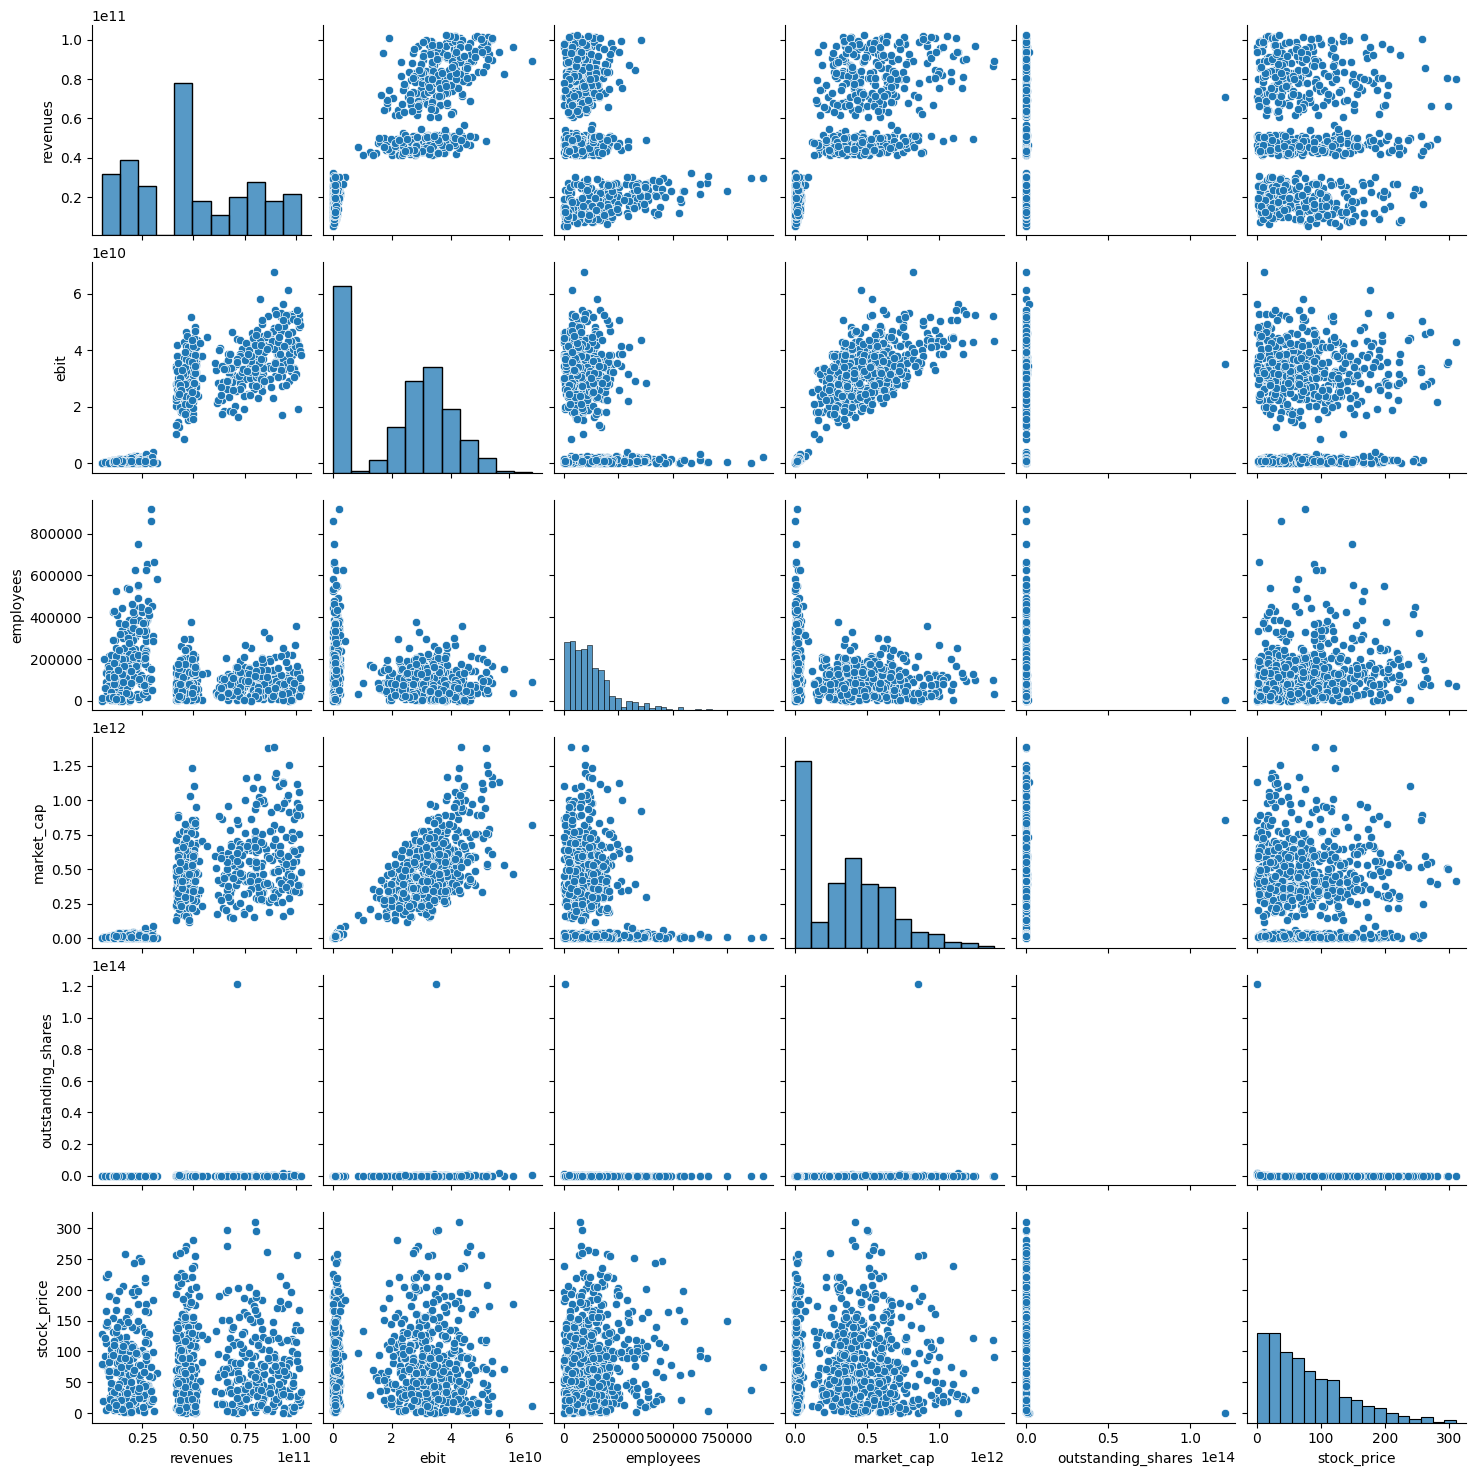

In [26]:
sns.pairplot(base_df)
plt.show()

# Outlier Detection

# Missing data

# Clustering

# Dim Reduction

# Visualization

# Predictions and models

# Self-Organizing Maps

In [27]:
from minisom import MiniSom

In [28]:
som_df = base_df.drop(columns=["industry"])
som_df.columns

Index(['revenues', 'ebit', 'employees', 'market_cap', 'outstanding_shares',
       'stock_price'],
      dtype='object')

In [29]:
target = base_df["industry"].values

In [30]:
data = (som_df - np.mean(som_df, axis=0)) / np.std(som_df, axis=0)
data = data.values

In [31]:
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, som_df.shape[1], sigma=1.5, learning_rate=0.5, random_seed=SEED, neighborhood_function='gaussian', topology="rectangular")

In [32]:
som.train(som_df.values, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: nan


/tmp/ipykernel_1127/4273804062.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


NameError: name 'label_names' is not defined

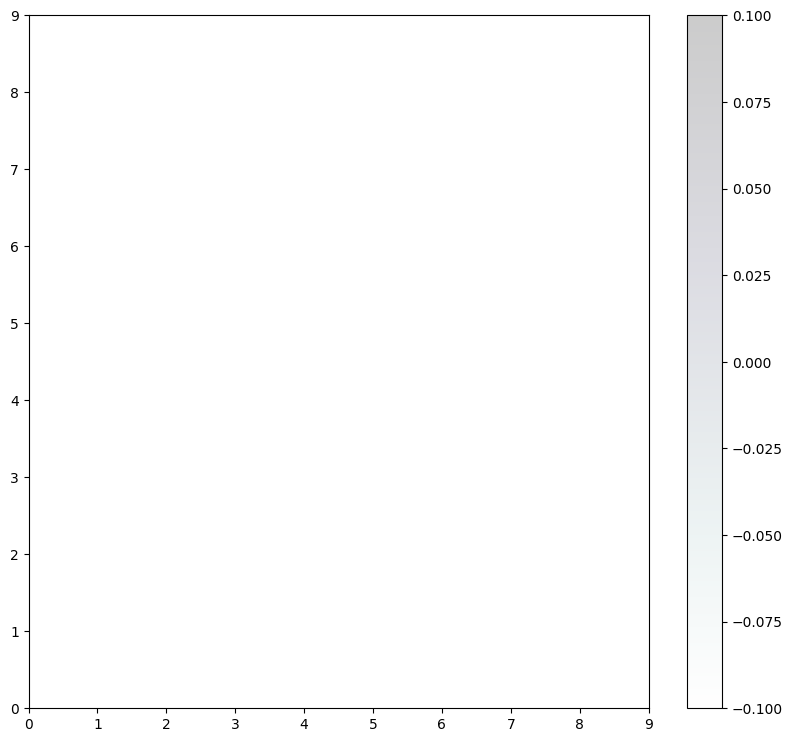

In [35]:
# colors = ['C0', 'C1', 'C2']
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50,  label=label_names[c]) #c=colors[c-1],
plt.legend(loc='upper right')
plt.grid()
plt.savefig('resulting_images/som_seed.png')
plt.show()